Import relevant packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

Define the function for running the remixing phase

In [2]:
def run_remix_idea_generation(N_steps, sig_mean, sig_pers):
    # Lists for storing data as they are generated
    t_vec = [] # vector of time in steps
    t_norm_vec = [] # normalized vector of time (i.e. t/N)
    u_vs_t = [] # utility of each new solutions in time
    sol_vec = [] # vector of solutions
    u_vs_sol = [] # utility of each new solutions (to be compared with sol_vec)
    t = 0

    solutions = {}
    # generate the first solution
    um = np.random.rand()
    id_solut = 0
    solutions[id_solut] = um
    
    for i in range(0, N_steps): # For each of the N steps of the loop
        # Select N designs
        L = min([last_n, len(solutions)]) # How many solutions is each person going to look at
        um_designs = random.choices(solutions, k=L) # Get the mean utility of the randomly selected L solutions
        u_designs = um_designs + np.random.normal(loc=0.0, scale=sig_pers, size=L) # Get the personal utility of the solutions
        
        # Get the solution with the maximum individual utility
        u_pers_max = max(u_designs)
        max_index = np.argmax(u_designs)
        um_max = um_designs[max_index]
        
        # create a new variation and choose if it should be added
        u_new_mean = um_max + np.random.normal(loc=0.0, scale=sig_mean)
        u_new_pers = u_new_mean + np.random.normal(loc=0.0, scale=sig_pers)
        if u_new_pers >= u_pers_max:
            id_solut += 1
            solutions[id_solut] = u_new_mean
            
            sol_vec.append(id_solut)
            u_vs_sol.append(max(solutions.values()))
            
        u_vs_t.append(max(solutions.values()))
        t_norm_vec.append(t/N_agents)
        t_vec.append(t)
        t += 1

    return u_vs_t, t_vec, t_norm_vec, sol_vec, u_vs_sol, solutions


# Run the remixing phase (phase 1)

In [3]:
np.random.seed(42)

In [4]:
sig_mean = 0.2 # Sigma of the average utility function
sig_pers = 0.5 # Sigma of the personal utility function
last_n = 10 # how many designs should each person go through

N_agents = 1000 # Number of agents

N_steps = 10**4 # Number of steps in the simulation

u_vs_t, t_vec, t_norm_vec, sol_vec, u_vs_sol, solutions = run_remix_idea_generation(N_steps, sig_mean, sig_pers)

# Test different versions of the voting phase

In [5]:
sig_pers=np.max(u_vs_t)*1 # i.e. m=1
N_votes = 50  # How many votes per single solution

N_rep = 10**2 # How many times the same configuration should be repeated

### Linear voting

In [6]:
best_u_vec = [] # List storing the normalized utility of the selected solution

for rep in range(0, N_rep):
    print(rep) 
    
    votes = solutions.copy() # Votes are going to be proportional to the solution
    
    for key_sol in solutions: # for each solution
        
        sol = solutions[key_sol]
        
        votes_sol = []
        for v in range(0, N_votes): # Simulate people producing N_votes
            sol_var = sol +  np.random.normal(loc=0.0, scale=sig_pers)

            vote = sol_var
            
            votes_sol.append(vote)
    
        votes[key_sol] = np.mean(votes_sol) # Calculate the mean vote

    max_key = max(votes, key=votes.get) # Select the top one

    best_u_vec.append(solutions[max_key]/max(solutions.values()))

    linear_voting = best_u_vec

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Logarithmic voting

In [7]:
best_u_vec = [] # List storing the normalized utility of the selected solution

for rep in range(0, N_rep):
    print(rep)
    
    votes = solutions.copy()
    
    for key_sol in solutions: # for each solution
        
        sol = solutions[key_sol]
        
        votes_sol = []
        for v in range(0, N_votes): # Simulate people producing N_votes
            sol_var = np.max([0, sol +  np.random.normal(loc=0.0, scale=sig_pers)]) 

            vote = np.log(sol_var+2) # people vote logarithmically
            
            votes_sol.append(vote)
    
        votes[key_sol] = np.mean(votes_sol)

    max_key = max(votes, key=votes.get)

    best_u_vec.append(solutions[max_key]/max(solutions.values()))

    log_voting = best_u_vec



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Quadratic style

In [8]:
best_u_vec = [] # List storing the normalized utility of the selected solution

for rep in range(0, N_rep):
    print(rep)
    
    votes = solutions.copy()
    
    for key_sol in solutions: # for each solution
        
        sol = solutions[key_sol]
        
        votes_sol = []
        for v in range(0, N_votes): # Simulate people producing N_votes
            sol_var = sol +  np.random.normal(loc=0.0, scale=sig_pers)

            vote = sol_var**2 # people vote quadratically
            
            votes_sol.append(vote)
    
        votes[key_sol] = np.mean(votes_sol)

    max_key = max(votes, key=votes.get)

    best_u_vec.append(solutions[max_key]/max(solutions.values()))

    quad_voting = best_u_vec

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Ranking

In [9]:
best_u_vec = []# List storing the normalized utility of the selected solution

for rep in range(0, N_rep):
    print(rep)
    
    votes = solutions.copy()
    
    n_other_sols = N_votes-1
    
    for key_sol in solutions: # for each solution
        
        sol = solutions[key_sol]
        votes_sol = []
        for v in range(0, N_votes): # Simulate people producing N_votes (every time this solution is selected together with other solutions and ranked)
            other_sols = random.choices(solutions, k=n_other_sols) +  np.random.normal(loc=0.0, scale=sig_pers, size=n_other_sols) # chose also other random solutions
            sol_var = sol +  np.random.normal(loc=0.0, scale=sig_pers)
    
            vote = sum(other_sols <= sol_var) # rank the solution
            votes_sol.append(vote)
    
        votes[key_sol] = np.mean(votes_sol)

    max_key = max(votes, key=votes.get)
    #print(max_key)

    best_u_vec.append(solutions[max_key]/max(solutions.values()))

    ranking_voting = best_u_vec

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


Show the result

(0.5, 4.5)

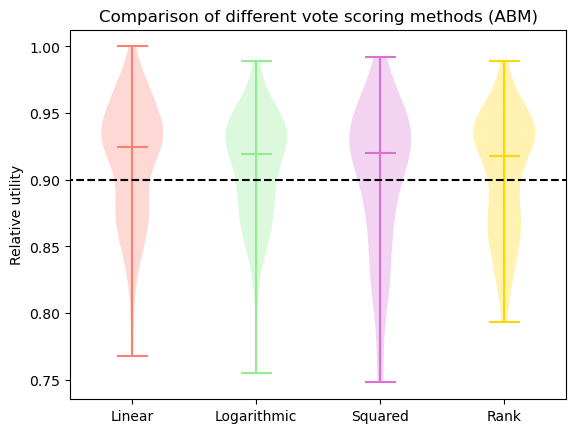

In [10]:
vp = plt.violinplot([linear_voting, log_voting, quad_voting, ranking_voting], showmeans=False, showmedians=True)

colors = ['salmon', 'lightgreen', 'orchid', 'gold']

# Color each violin
for i, body in enumerate(vp['bodies']):
    body.set_facecolor(colors[i])

# Color the lines: cbars, cmeans, cmedians
for i, color in enumerate(colors):
    if 'cbars' in vp:
        vp['cbars'].get_segments()[i]
        vp['cbars'].set_color(colors)
    if 'cmeans' in vp:
        vp['cmeans'].get_segments()[i]
        vp['cmeans'].set_color(colors)
    if 'cmedians' in vp:
        vp['cmedians'].get_segments()[i]
        vp['cmedians'].set_color(colors)
    if 'cmins' in vp:
        vp['cmins'].get_segments()[i]
        vp['cmins'].set_color(colors)
    if 'cmaxes' in vp:
        vp['cmaxes'].get_segments()[i]
        vp['cmaxes'].set_color(colors)

plt.xticks([1,2,3,4], ["Linear", "Logarithmic", "Squared", 'Rank'])  # Custom x-tick labels
plt.ylabel('Relative utility')
plt.title('Comparison of different vote scoring methods (ABM)')

plt.plot([-0.5,5],[0.9, 0.9],'k--')
plt.xlim([0.5,4.5])

Save the result for a conjoint figure

In [11]:
data = {"res":[linear_voting, log_voting, quad_voting, ranking_voting]}

with open('voting_methods_.pkl', 'wb') as f:
    pickle.dump(data, f)

# Full ABM

In [12]:
np.random.seed(42)

In [13]:
T_max = 1 # Maximum time spent per person on creating new solutions

N_agents_vec = [10, 50, 100, 500, 1000, 5 * 10**3, 10**4] # How many agents are going to be present each time
N_rep_tot = 100 # How many repetitions of the same configuration

N_votes = 10 # How many votes each person is going to cast

tentative_designs_per_person = T_max

sig_mean = 0.2 # Sigma of the average utility function
sig_pers = 0.5 # Sigma of the personal utility function

last_n = 10 # how many designs should each person go through

In [14]:
# Phase 1 idea generation
final_result = []
for jj, N_agents in enumerate(N_agents_vec): # for every set of agents (i.e. from N_agents_vec)
    print()
    print(N_agents)
    
    final_result.append([]) # Initialize the list with the results
    
    for ii in range(0, N_rep_tot): # for every repetition using the same initial conditions
        print(ii)

        N_steps = N_agents*tentative_designs_per_person
        u_vs_t, t_vec, t_norm_vec, sol_vec, u_vs_sol, solutions = run_remix_idea_generation(N_steps, sig_mean, sig_pers)


# Phase 2: distributed voting (select the top 10)
        
        votes_arr = np.array(list(solutions.values()))

        votes_arr = votes_arr + np.random.normal(loc=0.0, scale=sig_pers/np.sqrt(N_votes))
    
        top_10_keys = np.argsort(votes_arr)[-10:][::-1]

# Phase 3: final voting

        voted_solutions = {}
        for key in top_10_keys:
            original_value = solutions[key]
            voted_solutions[key] = original_value + np.mean(np.random.normal(loc=0.0, scale=sig_pers, size=N_agents))
        
        # Find the key with the highest noised value
        best_key = max(voted_solutions, key=voted_solutions.get)
        u_selected = solutions[best_key]
        
# Store the result
        
        final_result[jj].append(u_selected)



10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99

500
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40

Show the result

Text(0, 0.5, 'Utility of voted solution')

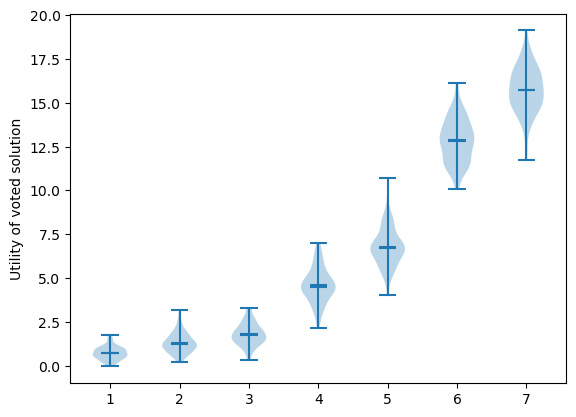

In [15]:
plt.violinplot(final_result, showmeans=True, showmedians=True)
plt.ylabel('Utility of voted solution')

Save it to be used for the generation of figure 3

In [16]:
data = {"x":N_agents_vec,
        'remixing_raw': final_result,
        'remixing_results': [np.mean(el) for el in final_result],
        'remixing_std': [np.std(el) for el in final_result],
    }

with open('abm_dino_.pkl', 'wb') as f:
    pickle.dump(data, f)